# Graph Theory Project

by [Ethan Conneely](https://github.com/IrishBruse?tab=repositories) (G00393941)

## Graph isomorphism problem

> The graph isomorphism problem is the computational problem of determining whether two finite graphs are isomorphic.  
> The problem is not known to be solvable in polynomial time nor to be NP-complete, and therefore may be in the computational complexity class NP-intermediate.  

[Wikipedia](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)

## Youtube

I watched this [video](https://www.youtube.com/watch?v=EwV4Puk2coU) for a visual explanation of what graph isomorphism is

## What is a Graph
A graph is a mathematical concept where vertices are connected by way of edges defining the relationship between said vertices.

![Graphs With 5 Edges](Images/Graphs%20With%205%20Edges.png)  
Image of graphs With 5 edges  

## What the Graph Isomorphism Problem is
The graph isomorphism problem is a problem in computer science and mathematics.  
It is used to determine whether two given graphs are isomorphic or not.  
A graph isomorphism is a bijective mapping between the vertices of two graphs that preserves the edges.  
In other words, two graphs are isomorphic if their nodes can be reorganized in a way that preserves the connections of the edges between them.  

## Applications of Graph Isomorphism Problem
The graph isomorphism problem has many practical applications in different fields such as computer science, chemistry, and physics.  
In computer science, graph isomorphism is used in database matching, network analysis, and software verification.   
In chemistry graph isomorphism is used to study molecular structure. In physics it is used to study the topology of physical systems.  
In biology it is used for dna analysis.  

## Importance of Graph Isomorphism Problem
The graph isomorphism problem is an important problem in computer science and mathematics. Its resolution would have a significant impact on  
several areas of research including [cryptography](https://www.acadpubl.eu/hub/2018-119-13/articles/40.pdf). The study of this problem  
has also led to the development of new mathematical tools and algorithms that have applications beyond the field of graph theory.  


# Code Examples

Libraries used

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
import numpy as np

With networkx in python we can define a graph with the following syntax

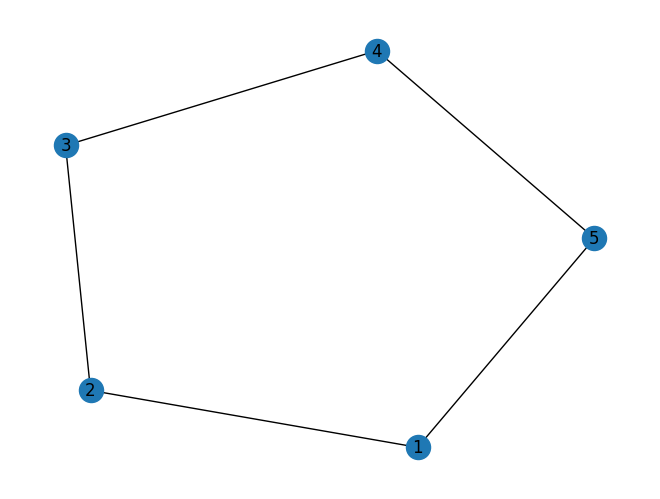

In [6]:
NumberGraph = nx.Graph()
NumberGraph.add_nodes_from([1,2,3,4,5])
NumberGraph.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])

nx.draw(NumberGraph, with_labels=True)

Next we draw 2 graphs side by side with matplotlib.
We can define nodes with letter or numbers or any piece of data we wish

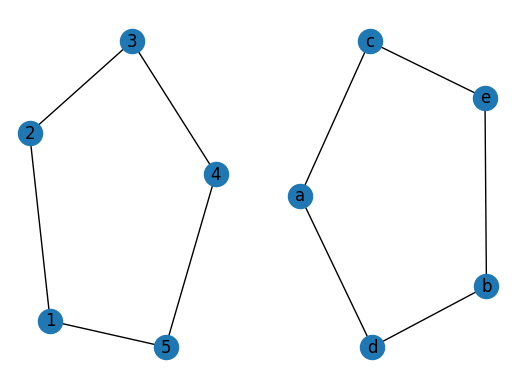

In [7]:
NumberGraph = nx.Graph()
NumberGraph.add_nodes_from([1,2,3,4,5])
NumberGraph.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])

LetterGraph = nx.Graph()
LetterGraph.add_nodes_from(["a","b","c","d","e"])
LetterGraph.add_edges_from([("a","c"),("b","d"),("c","e"),("d","a"),("e","b")])

plt.subplot(1,2,1) # Draw the first graph at index 1
nx.draw(NumberGraph,with_labels=True)

plt.subplot(1,2,2) # Draw the second graph at index 2
nx.draw(LetterGraph,with_labels=True)

plt.show()

Networkx comes with a builtin algorithm for detecting if graphs are isomorphic.  
Below we check the letter graph and number graph from before to test if they are isomorphic.  

In [8]:
nx.is_isomorphic(LetterGraph,NumberGraph)

True

Yes they are indeed isomorphic to one another as a graph does not need to have the same vertices/nodes for them to be isomorphic only the same connections/edges.

Using iter tools we can generate all the permutations of a graphs nodes easily we could use this as a way to test if 2 graphs are isomorphic.  
The only issue with that is it grows in factorial time which mean it only takes a few elements before it would take more memory and time than the total available on earth today combined.

Here is the first 10 permutations of the array of letters you can see there is a patter to what it does

In [22]:
nodes = it.permutations(np.array(["a","b","c","d","e"]))

for node in it.islice(nodes,0,10):
    print(node)

('a', 'b', 'c', 'd', 'e')
('a', 'b', 'c', 'e', 'd')
('a', 'b', 'd', 'c', 'e')
('a', 'b', 'd', 'e', 'c')
('a', 'b', 'e', 'c', 'd')
('a', 'b', 'e', 'd', 'c')
('a', 'c', 'b', 'd', 'e')
('a', 'c', 'b', 'e', 'd')
('a', 'c', 'd', 'b', 'e')
('a', 'c', 'd', 'e', 'b')


This is how many total permutations of the letter a,b,c,d,e
the formulat for the number of them is ```1*2*3*4*5```

In [23]:
nodes = it.permutations(np.array(["a","b","c","d","e"]))

count = 0
for node in nodes:
    count += 1

print()

print("Number of permutations: "+str(count))



Number of permutations: 120


Next is the [adjacency matrix](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html) of the graph  
it describes all the connections of the nodes inside that graph  

In [10]:
nx.adjacency_matrix(LetterGraph).todense()

array([[0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0]], dtype=int32)

The matrix is 5x5 as we defined the letter graph from before with 5 nodes/vertices.

You could imagine the matrix looking something like this

|   X   | A    | B    | C    | D    | E    |
| ----- | ---- | ---- | ---- | ---- | ---- |
| **A** | Loop | B-A  | C-A  | D-A  | E-A  |
| **B** | A-B  | Loop | C-B  | D-B  | E-B  |
| **C** | A-C  | B-C  | Loop | D-C  | E-C  |
| **D** | A-D  | B-D  | C-D  | Loop | E-D  |
| **E** | A-E  | B-E  | C-E  | D-E  | Loop |


The graph I created is not directed and has no loop backs so the graph is mirrored along the diagonal of the graph.  
eg edges are always connected in both directions eg `A` connect to `B` and `B` connect to `A`.  

# My Implementation

Below are 2 graphs i have created to show my basic implementation to check if 2 graphs are isomorphic.

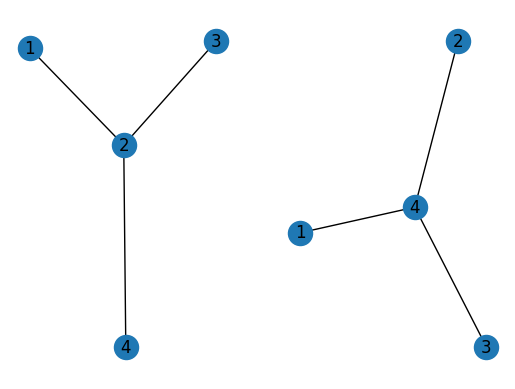

In [11]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4])
G1.add_edges_from([(1,2),(2,3),(2,4)])

G2 = nx.Graph()
G2.add_nodes_from([1,4,3,2])
G2.add_edges_from([(1,4),(4,3),(2,4)])

plt.subplot(1,2,1) # Draw the first graph at index 1
nx.draw(G1,with_labels=True)

plt.subplot(1,2,2) # Draw the second graph at index 2
nx.draw(G2,with_labels=True)

plt.show()

Networkx shows that they are indeed isomorphic

In [12]:
nx.is_isomorphic(G1,G2)

True

This is how you get the permutations of the graph which is need when checking if graphs are isomorphic

In [15]:
# Part of writing an algorithm to find the isomorphism between two graphs
# we need to make a permutation of all the adjacency matrices
# network x has a handy function to get the adjacency matrix of a graph

# get the permutations of the nodes
nodes = it.permutations(np.array(NumberGraph.nodes()))

# check if the adjacency matrix are the same for each permutation
for node in it.islice(nodes,0,4):
    # Get the adjacency matrix of the second graph with the nodes permuted
    graph2_adj_perm = nx.adjacency_matrix(NumberGraph,nodelist=node)
    print(graph2_adj_perm.todense())
    print("\n")


[[0 1 0 0 1]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [1 0 0 1 0]]


[[0 1 0 1 0]
 [1 0 1 0 0]
 [0 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]


[[0 1 0 0 1]
 [1 0 0 1 0]
 [0 0 0 1 1]
 [0 1 1 0 0]
 [1 0 1 0 0]]


[[0 1 0 1 0]
 [1 0 0 0 1]
 [0 0 0 1 1]
 [1 0 1 0 0]
 [0 1 1 0 0]]




Here is my naive implementation taking advantage of the speed of numpy

In [30]:
def is_isomorphic(graph1,graph2):
    # the graphs cant be isomorphic if they have different number of nodes or edges
    if graph1.number_of_nodes() != graph2.number_of_nodes():
        return False

    if graph1.number_of_edges() != graph2.number_of_edges():
        return False

    # get the adjacency matrices of the graph 1 to compare later
    adjacency1 = nx.adjacency_matrix(graph1)

    # get all the permutations of the nodes
    nodes = it.permutations(np.array(graph1.nodes()))

    # check if the adjacency matrix are the same for each permutation
    for node in nodes:
        # Get the adjacency matrix of the second graph with the nodes permuted
        graph2_adj_perm = nx.adjacency_matrix(graph2,nodelist=node)

        if np.array_equal(adjacency1.todense(),graph2_adj_perm.todense()):
            return True

    return False


In [31]:
G1 = nx.cycle_graph(50_000)
G2 = nx.cycle_graph(50_000)
is_isomorphic(G1,G2)


True

If I run the below Networkx crashes trying to check 2 50_000 node graphs for isomorphism it is also alot slower than my implementation  
which I assume is because of me using numpy which takes advantage of compiled c libraries instead of running an interpreted  
python implementation to check if the graphs are isomorphic.

In [32]:
# nx.is_isomorphic(G1,G2)

Now lets make 2 graphs that are not isomorphic

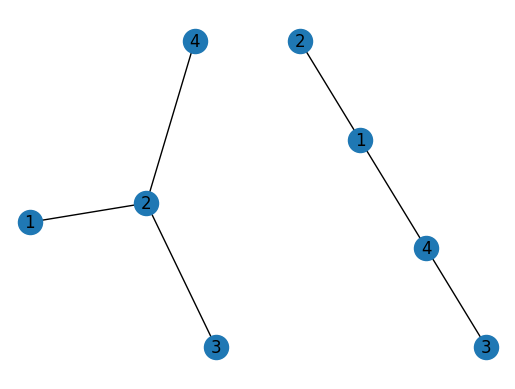

In [33]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4])
G1.add_edges_from([(1,2),(2,3),(2,4)])

G2 = nx.Graph()
G2.add_nodes_from([1,4,3,2])
G2.add_edges_from([(1,4),(4,3),(1,2)])

plt.subplot(1,2,1) # Draw the first graph at index 1
nx.draw(G1,with_labels=True)

plt.subplot(1,2,2) # Draw the second graph at index 2
nx.draw(G2,with_labels=True)

plt.show()

Lets make sure networkx says they are not isomorphic

In [34]:
print(nx.is_isomorphic(G1,G2))

False


Lets test my implementation to see if it is isomorphic

In [35]:
print(is_isomorphic(G1,G2))

False
